In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sktime.libs.vmdpy import VMD

# 时间轴从0到T
T = 1000
fs = 1 / T
t = np.arange(1, T + 1) / T
freqs = 2 * np.pi * (t - 0.5 - fs) / fs

# 各信号成分中心频率
f_1 = 2
f_2 = 24
f_3 = 288

# 构建各模式信号
v_1 = np.cos(2 * np.pi * f_1 * t)
v_2 = 1 / 4 * np.cos(2 * np.pi * f_2 * t)
v_3 = 1 / 16 * np.cos(2 * np.pi * f_3 * t)

# 原始信号，包含三个成分加上随机噪声
f = v_1 + v_2 + v_3 + 0.1 * np.random.randn(v_1.size)

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, lfilter, correlate, find_peaks
import pandas as pd
 
 
rows = 1000
time = np.linspace(0, 1, rows)
signal_data =f
# signal_df = pd.DataFrame(signal_data, columns=['Signal'])

In [4]:
#汉宁窗口初始化FIR滤波器组
def initialize_filters(L, K):
    filters = []
    for k in range(1, K+1):
        cutoff = 0.5 / k
        filter = firwin(L, cutoff, window='hann')
        filters.append(filter)
    return filters
#自相关普
def estimate_period(signal):
    correlation = correlate(signal, signal, mode='full')
    correlation = correlation[len(correlation) // 2:]
    peaks, _ = find_peaks(correlation)
    if len(peaks) > 1:
        period = peaks[1]
    else:
        period = len(signal)
    return period

 #FMD函数
def fmd(signal, n, L=100, max_iters=10):
    K = min(10, max(5, n))
    filters = initialize_filters(L, K)
    modes = []
    signal = signal.values.flatten() if isinstance(signal, pd.DataFrame) else signal.flatten()
 
    for i in range(max_iters):
        for filter in filters:
            filtered_signal = lfilter(filter, 1.0, signal)
            period = estimate_period(filtered_signal)
            modes.append(filtered_signal)
 
        if len(modes) >= n:
            break
 
    return modes[:n]

Mode 1: Max=1.4073958470454047, Min=-1.36301511965753
Mode 2: Max=1.3478038292613013, Min=-1.2796134115563784
Mode 3: Max=1.285611979567547, Min=-1.2533289894434885
Mode 4: Max=1.275161430987688, Min=-1.2327199030258371
Mode 5: Max=1.2654411855241214, Min=-1.2245306919896695


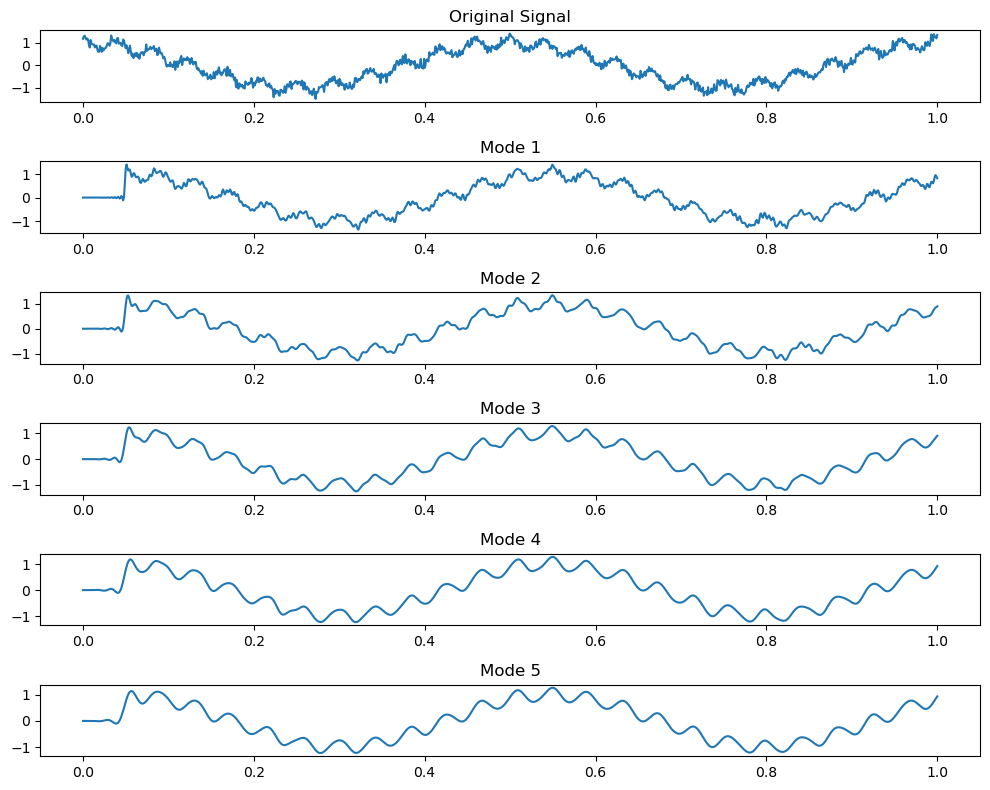

: 

In [ ]:
n = 5
modes = fmd(signal_data, n)
 
# 检查模态数据
for i, mode in enumerate(modes):
    print(f'Mode {i+1}: Max={np.max(mode)}, Min={np.min(mode)}')
 
# 绘制结果
plt.figure(figsize=(10, 8))
plt.subplot(len(modes) + 1, 1, 1)
plt.plot(time, signal_data)
plt.title('Original Signal')
 
for i, mode in enumerate(modes, start=1):
    plt.subplot(len(modes) + 1, 1, i+1)
    plt.plot(time, mode)
    plt.title(f'Mode {i}')
 
plt.tight_layout()
plt.show()